## Project Spotify AWS

### Content
- [Spotify API](#1)
- [Data Cleaning](#dc)
- [EDA](#eda)


#### Informacion Adicional: 
    
https://www.linkedin.com/pulse/mood-based-music-recommendation-python-spotify-api-burak-%C3%B6zt%C3%BCrk/?trk=public_profile_article_view

https://towardsdatascience.com/build-your-first-mood-based-music-recommendation-system-in-python-26a427308d96



mas complejo pero muy muy bueno ==> incluye modelo de NN para predecir 
https://github.com/kvsingh/music-mood-classification/blob/main/get-playlists-data.py


Enviar mail de reporte sobre el artista y recomendacion de su musica 

https://medium.com/mlearning-ai/spotify-api-project-using-python-5fbcab921f5e


https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50



https://towardsdatascience.com/build-your-first-mood-based-music-recommendation-system-in-python-26a427308d96


Music recomender going from a sad mood to a happy mood


https://www.mdpi.com/2076-3417/12/21/11209

https://github.com/MaxHilsdorf/mood-based-music-recommendation-system/blob/main/recommendation_system.ipynb


https://www.researchgate.net/figure/Emotional-classification-of-music-by-energy-and-valence-parameters-with-exemplary-songs_fig2_334084112




### Papers
https://www.sciencedirect.com/science/article/abs/pii/S019745561530006X

**Importamos las librerias a usar** 

In [1]:
import spotipy 
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import plotly.express as px
from sklearn import preprocessing

#importamos el archivo .py que hicimos para scrapear spotify con la API Spotipy 
import functions_spotify
from functions_spotify import get_track_data

### Spotify API <a id='1'></a>

In [2]:
CLIENT_ID= 'b39a670615f14cfca30a8178b3bc3ed6'

CLIENT_SECRET= '436db3dc10fd410e98e90625c79226ac'

In [3]:
auth_manager= SpotifyClientCredentials(client_id= CLIENT_ID, client_secret= CLIENT_SECRET)
sp= spotipy.Spotify(auth_manager= auth_manager)

In [4]:
df= get_track_data(100, CLIENT_ID, CLIENT_SECRET)

360880
starting strack  1 |
finished track details I
starting track features
finished track features II
218018
starting strack  2 ||
finished track details I
starting track features
finished track features II
285506
starting strack  3 |||
finished track details I
starting track features
finished track features II
209440
starting strack  4 ||||
finished track details I
starting track features
finished track features II
216426
starting strack  5 |||||
finished track details I
starting track features
finished track features II
170786
starting strack  6 ||||||
finished track details I
starting track features
finished track features II
256160
starting strack  7 |||||||
finished track details I
starting track features
finished track features II
213933
starting strack  8 ||||||||
finished track details I
starting track features
finished track features II
196394
starting strack  9 |||||||||
finished track details I
starting track features
finished track features II
226306
starting strack  10 |

Guardamos los datos como csv

In [5]:
df.drop_duplicates(subset = "id", keep = "first", inplace = True)
df.to_csv("scraped_spotify_dataset.csv", index = False) 

In [9]:
df.head()

,id,genre,track_name,artist_name,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio
0,4VJgrWjrkodaGiq3xKz62z,acoustic,Sometimes (I Wish),City and Colour,0.135,0.467,0.523,5,-7.713,0.0281,0.311,0.00002,0.3400,129.953,360880,38,https://p.scdn.co/mp3-preview/4de99ea0091b373c...
1,2Gb3up6s243JSVuRRjwQoF,acoustic,Nothing On You / Hey Soul Sister feat. Sam Tsui,Ahmir,0.369,0.698,0.721,10,-4.469,0.0328,0.193,0.00000,0.0713,106.020,218018,0,None
2,0WZ0sCWOXINYNpBtmfyd6C,acoustic,Everything,Ben Howard,0.341,0.261,0.525,3,-16.390,0.0521,0.722,0.00126,0.0497,141.805,285506,0,None
3,2lFTzUnuGaWlWHJQokjRyb,acoustic,Blue Jeans,Lana Del Rey,0.488,0.837,0.558,3,-4.405,0.0633,0.418,0.00000,0.0821,117.963,209440,65,None
4,1nuqzCMgj2lxZCmpdCmIGv,acoustic,A Lack of Color,Various Artists,0.357,0.337,0.635,3,-12.125,0.0288,0.805,0.00256,0.1420,135.826,216426,35,https://p.scdn.co/mp3-preview/a205541452cdc7be...


In [7]:
df.shape

(11133, 17)

In [10]:
df.columns

Index(['id', 'genre', 'track_name', 'artist_name', 'valence', 'energy',
       'danceability', 'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'popularity',
       'audio'],
      dtype='object')

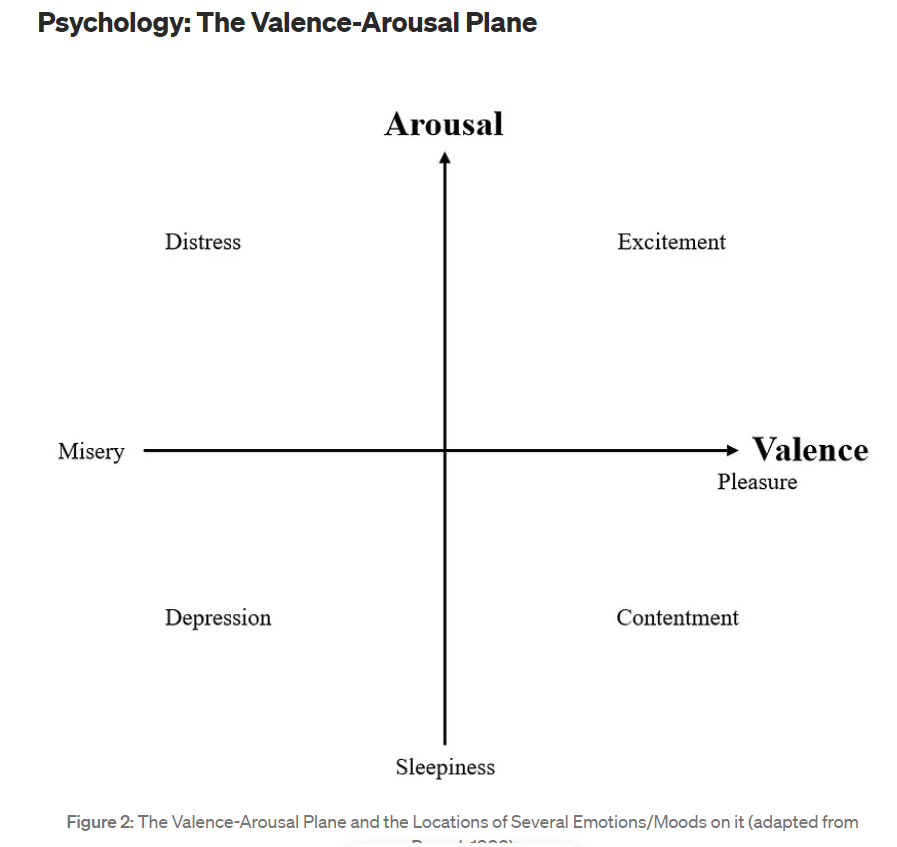

In [23]:
from IPython.display import Image
Image(filename='Captura de pantalla 2023-04-19 104350.png') 

### EDA <a id='eda'></a>

In [2]:
df= pd.read_csv('data/scraped_spotify_dataset_new.csv')

In [3]:
df.head()

,id,genre,track_name,artist_name,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard
0,3AJwUDP919kvQ9QcozQPxg,happy,Yellow,Coldplay,0.285,0.661,0.429,11,-7.227,0.0281,0.00239,0.000121,0.2340,173.372,266773,90,https://p.scdn.co/mp3-preview/c0d9119dc69cae75...,-0.004099,-0.774843
1,0nJW01T7XtvILxQgC5J7Wh,chill,When I Was Your Man,Bruno Mars,0.387,0.280,0.612,0,-8.648,0.0434,0.93200,0.000000,0.0880,72.795,213826,89,https://p.scdn.co/mp3-preview/159fc05584217baa...,-1.520702,-0.395737
2,5O2P9iiztwhomNh8xkR9lJ,pop,Night Changes,One Direction,0.370,0.520,0.672,8,-7.747,0.0353,0.85900,0.000000,0.1150,120.001,226600,89,https://p.scdn.co/mp3-preview/359be833b46b250c...,-0.565362,-0.458921
3,1mea3bSkSGXuIRvnydlB5b,happy,Viva La Vida,Coldplay,0.417,0.617,0.486,5,-7.115,0.0287,0.09540,0.000003,0.1090,138.015,242373,88,https://p.scdn.co/mp3-preview/fb9f4a9b08873267...,-0.179245,-0.284235
4,7795WJLVKJoAyVoOtCWqXN,pop,I'm Not The Only One,Sam Smith,0.493,0.485,0.677,5,-5.795,0.0361,0.52900,0.000020,0.0766,82.001,239316,87,NaN,-0.704682,-0.001765


In [4]:
sum(df.track_name.isna())

6

In [5]:
df = df[df['track_name'].notna()]

In [6]:
df.fillna('0', inplace= True)

In [7]:
df.describe()

,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,energy_standard,valence_standard
count,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,1.112700e+04,11127.000000,11127.000000,11127.000000
mean,0.493365,0.662097,0.554516,5.312933,-8.238329,0.083410,0.284366,0.178241,0.203835,122.748004,2.517699e+05,18.601420,0.000269,-0.000408
std,0.269024,0.251232,0.176572,3.558686,4.808403,0.108569,0.328953,0.318154,0.177741,29.012988,1.189065e+05,23.741828,1.000049,0.999886
min,0.000000,0.000000,0.000000,0.000000,-45.393000,0.000000,0.000000,0.000000,0.000000,0.000000,3.056000e+03,0.000000,-2.635266,-1.834108
25%,0.269000,0.493500,0.441000,2.000000,-10.162500,0.036200,0.008385,0.000000,0.094000,100.529000,1.957215e+05,0.000000,-0.670847,-0.834310
50%,0.492000,0.715000,0.568000,5.000000,-6.999000,0.048700,0.115000,0.000246,0.130000,123.799000,2.345330e+05,2.000000,0.210853,-0.005481
75%,0.717000,0.874000,0.685000,8.000000,-4.981000,0.084000,0.541000,0.163500,0.266000,139.964500,2.858530e+05,36.000000,0.843766,0.830781
max,0.998000,1.000000,0.965000,11.000000,2.127000,0.962000,0.996000,0.994000,0.994000,218.967000,4.719013e+06,90.000000,1.345319,1.875180


#### Top 10 Most Popular Songs

In [8]:
df[['track_name', 'artist_name','genre', 'popularity', 'valence', 'energy']].sort_values(by= 'popularity', ascending=False).head(10)

,track_name,artist_name,genre,popularity,valence,energy
0,Yellow,Coldplay,happy,90,0.285,0.661
2,Night Changes,One Direction,pop,89,0.370,0.520
1,When I Was Your Man,Bruno Mars,chill,89,0.387,0.280
3,Viva La Vida,Coldplay,happy,88,0.417,0.617
4,I'm Not The Only One,Sam Smith,pop,87,0.493,0.485
5,Take on Me,a-ha,synth-pop,87,0.876,0.902
6,Counting Stars,OneRepublic,pop,86,0.477,0.705
7,Umbrella,Rihanna,children,86,0.575,0.829
11,Bound 2,Kanye West,road-trip,85,0.310,0.665
13,Feel Good Inc.,Gorillaz,trip-hop,85,0.772,0.705


#### Psycology & Emotions
**Arousal - Energy Plane**

*Arousal referred to the energy level of the music,

In [9]:
top_100= df[['track_name', 'artist_name','genre', 'popularity', 'valence', 'energy']].sort_values(by= 'popularity', ascending=False).head(100)
fig = px.scatter(top_100,  x='valence', y="energy", color="genre", 
                 title="Valence Arousal Plane",
                 labels={"valence":"Valence"} # customize axis label
                )

fig.show()

In [10]:
fig = px.histogram(df, x="energy")
fig.update_layout(bargap=0.2)
fig.show()

fig = px.histogram(df, x="valence")
fig.update_layout(bargap=0.2)
fig.show()

Vamos a hacer un data standarization asi tenemos valores entre -1 y 1. Con media 0 y desvio estandar de 1

In [11]:
energy_standard = preprocessing.scale(df.energy)
valence_standard= preprocessing.scale(df.valence)
df['energy_standard']= energy_standard
df['valence_standard']= valence_standard

df.rename(columns={'track_name': 'Track', 
                   'artist_name': 'Artist', 
                   'genre': 'Genre'}, inplace=True)

In [12]:
df.head()

,id,Genre,Track,Artist,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard
0,3AJwUDP919kvQ9QcozQPxg,happy,Yellow,Coldplay,0.285,0.661,0.429,11,-7.227,0.0281,0.00239,0.000121,0.2340,173.372,266773,90,https://p.scdn.co/mp3-preview/c0d9119dc69cae75...,-0.004369,-0.774557
1,0nJW01T7XtvILxQgC5J7Wh,chill,When I Was Your Man,Bruno Mars,0.387,0.280,0.612,0,-8.648,0.0434,0.93200,0.000000,0.0880,72.795,213826,89,https://p.scdn.co/mp3-preview/159fc05584217baa...,-1.520966,-0.395392
2,5O2P9iiztwhomNh8xkR9lJ,pop,Night Changes,One Direction,0.370,0.520,0.672,8,-7.747,0.0353,0.85900,0.000000,0.1150,120.001,226600,89,https://p.scdn.co/mp3-preview/359be833b46b250c...,-0.565629,-0.458586
3,1mea3bSkSGXuIRvnydlB5b,happy,Viva La Vida,Coldplay,0.417,0.617,0.486,5,-7.115,0.0287,0.09540,0.000003,0.1090,138.015,242373,88,https://p.scdn.co/mp3-preview/fb9f4a9b08873267...,-0.179514,-0.283872
4,7795WJLVKJoAyVoOtCWqXN,pop,I'm Not The Only One,Sam Smith,0.493,0.485,0.677,5,-5.795,0.0361,0.52900,0.000020,0.0766,82.001,239316,87,0,-0.704949,-0.001357


In [13]:
df.sort_values(by= 'popularity', ascending=False, inplace=True)
df.to_csv("scraped_spotify_dataset_ok.csv", index = False) 

In [14]:
df_new= df.head(5000)
df_new.to_csv('aws_spotify_dataset.csv')

In [15]:
df.head()

,id,Genre,Track,Artist,valence,energy,danceability,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard
0,3AJwUDP919kvQ9QcozQPxg,happy,Yellow,Coldplay,0.285,0.661,0.429,11,-7.227,0.0281,0.00239,0.000121,0.2340,173.372,266773,90,https://p.scdn.co/mp3-preview/c0d9119dc69cae75...,-0.004369,-0.774557
2,5O2P9iiztwhomNh8xkR9lJ,pop,Night Changes,One Direction,0.370,0.520,0.672,8,-7.747,0.0353,0.85900,0.000000,0.1150,120.001,226600,89,https://p.scdn.co/mp3-preview/359be833b46b250c...,-0.565629,-0.458586
1,0nJW01T7XtvILxQgC5J7Wh,chill,When I Was Your Man,Bruno Mars,0.387,0.280,0.612,0,-8.648,0.0434,0.93200,0.000000,0.0880,72.795,213826,89,https://p.scdn.co/mp3-preview/159fc05584217baa...,-1.520966,-0.395392
3,1mea3bSkSGXuIRvnydlB5b,happy,Viva La Vida,Coldplay,0.417,0.617,0.486,5,-7.115,0.0287,0.09540,0.000003,0.1090,138.015,242373,88,https://p.scdn.co/mp3-preview/fb9f4a9b08873267...,-0.179514,-0.283872
4,7795WJLVKJoAyVoOtCWqXN,pop,I'm Not The Only One,Sam Smith,0.493,0.485,0.677,5,-5.795,0.0361,0.52900,0.000020,0.0766,82.001,239316,87,0,-0.704949,-0.001357


In [16]:
top_100= df[['Track', 'Artist','Genre', 'popularity', 'valence_standard', 'energy_standard']].sort_values(by= 'popularity', ascending=False).head(100)
fig = px.scatter(top_100,  x='valence_standard', y="energy_standard", color='Genre',
                 title="Music Psychology: Valence Arousal Plane",
                 labels={"valence_standard":"</b>Valence</b>", 
                         "energy_standard": '</b>Arousal</b>'},
                 hover_data=["Genre", "Track", "Artist"],
                 width=1000, height=800, 
                 template="plotly_dark"
                 )

fig.add_hline(y=0, line_color="grey")
fig.add_vline(x=0,  line_color="grey")

fig.add_annotation(x=1, y=1,
            text="Excitement",
            font=dict(size=15,),
            showarrow=False,
        opacity=0.8)
fig.add_annotation(x=-1, y=1,
            text="Distress",
            font=dict(size=15,),
            showarrow=False, )
fig.add_annotation(x=-1, y=-1,
            text="Depression",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=1, y=-1,
            text="Contentment",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=0, y=-1.8,
            text="Sleepiness",
            font=dict(size=15,),
            showarrow=False, 
            )
fig.add_annotation(x=-1.8, y=0,
            text="Misery",
            font=dict(size=15,),
            showarrow=False, bgcolor="#000000",
            )
fig.add_annotation(x=1.8, y=0,
            text="Pleasure",
            font=dict(size=15,),
            showarrow=False, bgcolor="#000000",
          )

fig.update_layout(yaxis_range=[-2,2], xaxis_range= [-2, 2])

fig.show()

Music recomender going from a sad mood to a happy mood

este articulo es clave -> contexto cientifico y porque es importante
https://www.mdpi.com/2076-3417/12/21/11209

https://github.com/MaxHilsdorf/mood-based-music-recommendation-system/blob/main/recommendation_system.ipynb


#### Music Recommender Algorithm 

In [79]:
df["mood_vec"] = df[["valence_standard", "energy_standard"]].values.tolist()

In [17]:
def distance(p1, p2):
    distance_x = p2[0]-p1[0]
    distance_y = p2[1]-p1[1]
    distance_vec = [distance_x, distance_y]
    norm = (distance_vec[0]**2 + distance_vec[1]**2)**(1/2)
    return norm

Vector [arousal, valence]

In [18]:
p1= [ -0.9, -1.07]
p2= [1.582218,1.04 ]
distance(p1,p2)

0.6828772946320589

1. Hallar la recta entre los dos puntos 
2. Hallar n puntos P que pertencen a la recta 
3. Hallar 1 punto de la cancion que este cerca de cada P => ver codigo de la norma para buscar los mas cercanos 
4. Lista de canciones 

[1.36712268 0.16041041]
a = 1.3671226804123706
b = 0.1604104123711342


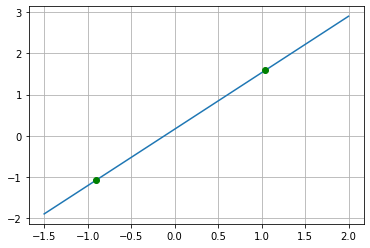

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the known points
p1= [ -0.9, -1.07]
p2= [1.04, 1.582218]

x = [p1[0], p2[0]]
y= [p1[1], p2[1]]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)
print(coefficients)
# Print the findings
print('a =', coefficients[0])
print('b =', coefficients[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(-1.5,2,2)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.plot( x[0], y[0], 'go' )
plt.plot( x[1], y[1], 'go' )
plt.grid('on')
plt.show()

Y= ax + b

In [95]:
import pandas as pd

import numpy as np
from numpy.linalg import norm

p1= [ -0.9, -1.07]
p2= [1.04, 1.582218]

x = [p1[0], p2[0]]
y= [p1[1], p2[1]]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)


a= coefficients[0]
b= coefficients[1]
n= 5
p1x= p1[0]
p2x= p2[0]
#cuanto vamos a sumar en x por cada n de canciones q se deseen q sean recomendadas 
sumax= (p2x- p1x)/n


lista_x= []
for num in range(1,n+1):
    x1= p1x + sumax * num
    lista_x.append(x1)
    
#para cada x que esta en el rango de los puntos hallamos el valor de Y => de esta forma hallamos los Valores P 
lista_y= []
for num in lista_x: 
    y= a* num + b
    lista_y.append(y)

lista_p=[]
for num in range(0,n): 
    p= np.array(lista_x[num], lista_y[num])
    lista_p.append(p)
    

In [117]:
df_recommended= pd.DataFrame()

for n in range(len(lista_p)): 
    
    point_p= lista_p[n]
    print(point_p)
    
    df["distances"] = df["mood_vec"].apply(lambda x: norm(point_p-np.array(x)))

    # Sort distances from lowest to highest
    df_sorted = df.sort_values(by = "distances", ascending = True)
    df_sorted.reset_index(inplace=True)
    print(df_sorted[['id']].loc[0])
    
    df2= df_sorted.head(1)
    
    df_recommended= pd.concat([df_recommended, df2], ignore_index=True)


    

-0.404
id    0yA1MBQ60SoiYt7xqdS3H1
Name: 0, dtype: object
0.09199999999999997
id    5lTyGhdcbmWdruvaRB5uAV
Name: 0, dtype: object
0.588
id    1WSZS7D5ezAGAUCTbXjnfx
Name: 0, dtype: object
1.084
id    3KBQoWXuEuOpRwEMrDAdMb
Name: 0, dtype: object
1.58
id    6JqRG2jWNSNFj9HAoa81xu
Name: 0, dtype: object


In [118]:
df_recommended

,index,id,Genre,Track,Artist,valence,energy,danceability,key,loudness,...,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard,mood_vec,distances
0,2052,0yA1MBQ60SoiYt7xqdS3H1,chill,Mmm Mmm Mmm Mmm,Crash Test Dummies,0.383,0.564,0.585,3,-7.579,...,0.000022,0.0609,92.949,233266,45,https://p.scdn.co/mp3-preview/f2d48710e51b228c...,-0.390484,-0.410261,"[-0.4102608309515796, -0.3904838597499145]",0.014896
1,8733,5lTyGhdcbmWdruvaRB5uAV,power-pop,Scarborough,Farrah,0.520,0.686,0.553,11,-8.081,...,0.000244,0.1080,103.014,183733,0,0,0.095146,0.099011,"[0.0990108439087672, 0.09514572046262114]",0.007684
2,5640,1WSZS7D5ezAGAUCTbXjnfx,anime,寄り添ってあげたい,レイティア(大坪由佳),0.653,0.809,0.634,5,-3.696,...,0.000000,0.1410,122.017,280173,1,https://p.scdn.co/mp3-preview/d721b4975a5010bf...,0.584756,0.593413,"[0.5934132727877897, 0.5847558710047681]",0.006311
3,5480,3KBQoWXuEuOpRwEMrDAdMb,latino,Dormir Soñando,El Gran Silencio,0.786,0.935,0.705,9,-6.646,...,0.000005,0.1490,112.840,189493,3,0,1.086308,1.087816,"[1.0878157016668117, 1.0863077325357475]",0.004459
4,1333,6JqRG2jWNSNFj9HAoa81xu,turkish,Şeytan,Serdar Ortaç,0.896,0.989,0.710,10,-4.598,...,0.001010,0.3270,128.016,313880,54,https://p.scdn.co/mp3-preview/1e76723634ca0ad3...,1.301259,1.496720,"[1.4967199661532211, 1.3012585303347386]",0.290916


In [104]:
df_sorted.head(1)

,index,id,Genre,Track,Artist,valence,energy,danceability,key,loudness,...,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard,mood_vec,distances
0,8733,5lTyGhdcbmWdruvaRB5uAV,power-pop,Scarborough,Farrah,0.52,0.686,0.553,11,-8.081,...,0.000244,0.108,103.014,183733,0,0,0.095146,0.099011,"[0.0990108439087672, 0.09514572046262114]",0.007684


puntos bases 

In [119]:
sad= [-1, -1]
excited= [0.5, 1.5]
happy= [1, 0.5]
calm= [1, -1]
distressed= [-0.5, 1.5]
sleepy= [0, -1.5]
angry=[-1, 1]
nervous= [-1.5, 0]

In [127]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

def mood_beat(mood1, mood2,df ):
    
    sad= [-1, -1]
    excited= [0.5, 1.5]
    happy= [1, 0.5]
    calm= [1, -1]
    distressed= [-0.5, 1.5]
    sleepy= [0, -1.5]
    angry=[-1, 1]
    nervous= [-1.5, 0]


    if mood1== 'sad':
        p1= sad
    if mood1=='nervous': 
        p1= nervous
    if mood2=='happy':
        p2= happy
    if mood2=='calm':
        p2= calm
    


    print(p1, p2)

    x = [p1[0], p2[0]]
    y= [p1[1], p2[1]]

    # Calculate the coefficients. This line answers the initial question. 
    coefficients = np.polyfit(x, y, 1)


    a= coefficients[0]
    b= coefficients[1]
    n= 10
    p1x= p1[0]
    p2x= p2[0]
    #cuanto vamos a sumar en x por cada n de canciones q se deseen q sean recomendadas 
    sumax= (p2x- p1x)/n


    lista_x= []
    for num in range(1,n+1):
        x1= p1x + sumax * num
        lista_x.append(x1)
    
    #para cada x que esta en el rango de los puntos hallamos el valor de Y => de esta forma hallamos los Valores P 
    lista_y= []
    for num in lista_x: 
        y= a* num + b
        lista_y.append(y)

    lista_p=[]
    for num in range(0,n): 
        p= np.array(lista_x[num], lista_y[num])
        lista_p.append(p)
    
    print(lista_p)
        
    #### hasta aca tenemos todos los puntos p => sigue hallar las canciones mas cercanas a cada punto 
    
    df_recommended= pd.DataFrame()

    for n in range(len(lista_p)): 
    
        point_p= lista_p[n]
        print(point_p)
    
        df["distances"] = df["mood_vec"].apply(lambda x: norm(point_p-np.array(x)))

        # Sort distances from lowest to highest
        df_sorted = df.sort_values(by = "distances", ascending = True)
        df_sorted.reset_index(inplace=True)
        print(df_sorted[['id']].loc[0])
    
        df2= df_sorted.head(1)
    
        df_recommended= pd.concat([df_recommended, df2], ignore_index=True)

    return df_recommended
    

In [128]:
mood_beat('nervous', 'happy', df)

[-1.5, 0] [1, 0.5]
[array(-1.25), array(-1.), array(-0.75), array(-0.5), array(-0.25), array(0.), array(0.25), array(0.5), array(0.75), array(1.)]
-1.25
id    7keXdrB4mz57u4b8YkCwag
Name: 0, dtype: object
-1.0
id    47vFyxAv24QxAOfdMuE3oV
Name: 0, dtype: object
-0.75
id    0tiFAoHT0dBr3kk7owGL7q
Name: 0, dtype: object
-0.5
id    7LDe75cRmbXNcMTGXR5sze
Name: 0, dtype: object
-0.25
id    3q9gvnXHVKaFYSe0cf4ISN
Name: 0, dtype: object
0.0
id    0ancVQ9wEcHVd0RrGICTE4
Name: 0, dtype: object
0.25
id    2VLyYc2ytsYVOkP963joVX
Name: 0, dtype: object
0.5
id    0OBwxFLu6Yj61s2OagYbgY
Name: 0, dtype: object
0.75
id    28QkqSjl1Pi0niDc20RDl0
Name: 0, dtype: object
1.0
id    6KJJpEyPlgK8ZwOfffR9ij
Name: 0, dtype: object


,index,id,Genre,Track,Artist,valence,energy,danceability,key,loudness,...,instrumentalness,liveness,tempo,duration_ms,popularity,audio,energy_standard,valence_standard,mood_vec,distances
0,736,7keXdrB4mz57u4b8YkCwag,singer-songwriter,Dreaming with a Broken Heart,John Mayer,0.155,0.349,0.610,0,-9.321,...,0.009900,0.2010,136.012,245746,63,https://p.scdn.co/mp3-preview/1b13e01fc05e44a8...,-1.246306,-1.257808,"[-1.2578078518870461, -1.2463064806162683]",0.008637
1,1985,47vFyxAv24QxAOfdMuE3oV,new-age,Nara (Theme to Cold Case),E.S. Posthumus,0.225,0.413,0.563,9,-12.589,...,0.717000,0.1410,149.997,291026,45,https://p.scdn.co/mp3-preview/cc682f25ae188353...,-0.991550,-0.997596,"[-0.9975960472138766, -0.9915499795211675]",0.008785
2,1855,0tiFAoHT0dBr3kk7owGL7q,malay,Terukir Di Bintang,Yuna,0.288,0.473,0.452,4,-5.050,...,0.000000,0.1130,125.010,182800,47,0,-0.752716,-0.763405,"[-0.7634054230080239, -0.7527157597445107]",0.013678
3,10976,7LDe75cRmbXNcMTGXR5sze,rainy-day,Rocket Man (I Think It's Going To Be A Long Lo...,Elton John,0.353,0.537,0.602,10,-9.347,...,0.000005,0.0822,136.553,283800,0,0,-0.497959,-0.521780,"[-0.5217801758115092, -0.49795925864940976]",0.021876
4,7344,3q9gvnXHVKaFYSe0cf4ISN,indian,Piya aaye na,Various Artists,0.431,0.598,0.268,4,-8.149,...,0.000074,0.2710,75.222,286223,0,0,-0.255144,-0.231830,"[-0.23182987917569148, -0.25514446854314216]",0.018884
5,5848,0ancVQ9wEcHVd0RrGICTE4,garage,Take Me Out,Franz Ferdinand,0.490,0.664,0.279,9,-8.851,...,0.000655,0.1330,104.560,237026,0,0,0.007573,-0.012509,"[-0.012508500951162757, 0.0075731732111806475]",0.014622
6,4679,2VLyYc2ytsYVOkP963joVX,detroit-techno,Sleep Cycle,Robert Hood,0.562,0.730,0.720,11,-12.610,...,0.921000,0.4990,134.579,412520,13,https://p.scdn.co/mp3-preview/64a3d10bb1a62b7d...,0.270291,0.255138,"[0.25513792671266916, 0.270290814965503]",0.020931
7,255,0OBwxFLu6Yj61s2OagYbgY,hard-rock,Gimme All Your Lovin',ZZ Top,0.630,0.788,0.630,5,-6.700,...,0.023700,0.0883,120.059,241080,73,https://p.scdn.co/mp3-preview/a280a71ea35a15b5...,0.501164,0.507915,"[0.5079151083951766, 0.5011638940829377]",0.008000
8,11094,28QkqSjl1Pi0niDc20RDl0,reggaeton,Amor Prohibido,Baby Rasta & Gringo,0.693,0.854,0.753,8,-6.177,...,0.000004,0.0667,87.017,213000,0,0,0.763882,0.742106,"[0.7421057326010292, 0.7638815358372609]",0.015969
9,4684,6KJJpEyPlgK8ZwOfffR9ij,pagode,This Love,Various Artists,0.762,0.911,0.664,7,-4.431,...,0.000000,0.4380,111.334,198693,13,https://p.scdn.co/mp3-preview/4d88e3586f6bef54...,0.990774,0.998600,"[0.9986002257788681, 0.9907740446250848]",0.009332
